In [7]:
import os
from glob import glob
datadirs = glob("structured-2018*")

In [9]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import json
maprootdir = os.path.join('..', 'week6', 'cwl-data', 'maps', 'ww2')

map_images = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png',
    'USS Texas': 'uss_texas.png',
    'ValkyrieL': 'valkyrie.png'
}

def visualizematch(matchdata, background_image, imagefile):
    spawn_xs = []
    spawn_ys = []
    death_xs = []
    death_ys = []
    for e in matchdata['events']:
        if e['type'] == 'spawn':
            spawn_ys.append(e['data']['pos']['y'])
            spawn_xs.append(e['data']['pos']['y'])
        if e['type'] == 'death':
            death_ys.append(e['data']['pos']['y'])
            death_xs.append(e['data']['pos']['y'])
            
#create figure
    fig, ax = plt.subplots(1,1)
    fig = Figure()
    FigureCanvas(fig)
    ax = fig.subplots(1,1)

    fig.set_figheight(15)
    fig.set_figwidth(15)

#plot background
    img = plt.imread(background_image)
    ax.imshow(img)

    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
#plot spawns and deaths
    ax.scatter(spawn_xs, spawn_ys, color='cyan')
    ax.scatter(death_xs, death_ys, color='red')
    ax.set_title('{}({})'.format(matchdata['map'], matchdata['mode']))
    fig.savefig(imagefile)







In [10]:
import ujson

maprootdir = os.path.join('..', 'week6', 'cwl-data', 'maps', 'ww2')

map_images = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png',
    'USS Texas': 'uss_texas.png',
    'ValkyrieL': 'valkyrie.png'
}

def parsejsonmatch(jsonfile, imagefile):
    with open(jsonfile, 'r') as f:
        rawdata = f.read()
    data = ujson.loads(rawdata)
    
    mapname = data['map']
    if mapname in map_images:
        mapfilename = map_images[mapname]
        background_image = os.path.join(maprootdir, mapfilename)
        visualizematch(data, background_image, imagefile)
    else:
        print("Bad mapname encountered in {}".format(jsonfile))

Bad mapname encountered in structured-2018-04-01-birmingham/structured-1522535103-37481994-70da-5003-afa5-05987d20c558.json


/home/vagrant/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Bad mapname encountered in structured-2018-04-01-birmingham/structured-1522440815-acd81c00-4d15-59e5-b145-47e15be5309b.json
Bad mapname encountered in structured-2018-04-01-birmingham/structured-1522429248-1c7b04cf-e5a0-591b-aae5-7d4803110115.json
Bad mapname encountered in structured-2018-04-01-birmingham/structured-1522523833-9c9120c5-34c9-5888-8aba-91c575bf0b42.json
Bad mapname encountered in structured-2018-04-01-birmingham/structured-1522513858-085b5d2e-50ed-57f5-b4da-a19aa0b259df.json


SystemError: <built-in method write of _io.BufferedWriter object at 0x7fa7f00680f8> returned a result with an error set

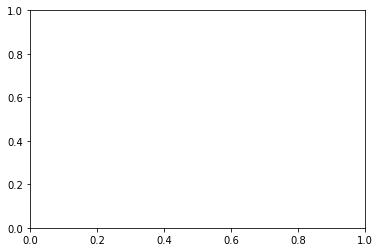

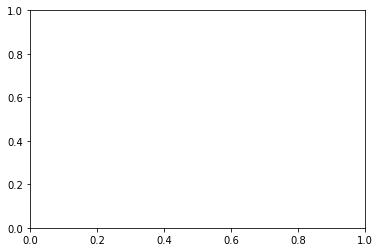

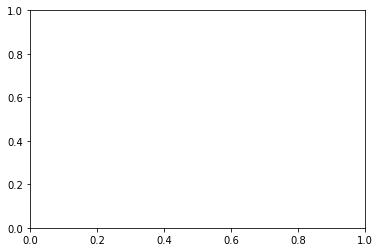

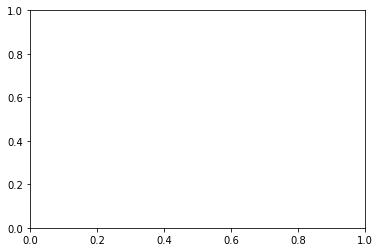

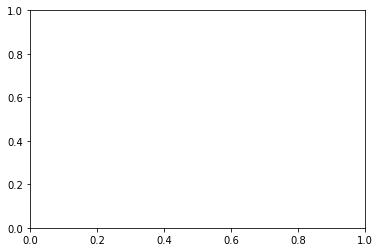

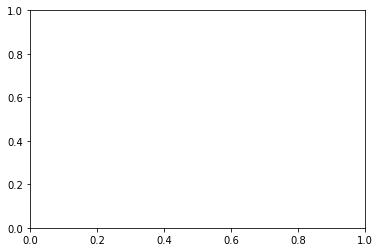

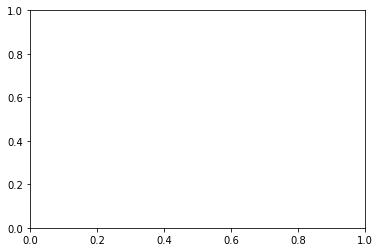

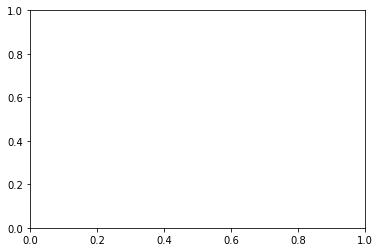

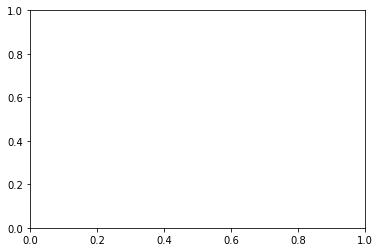

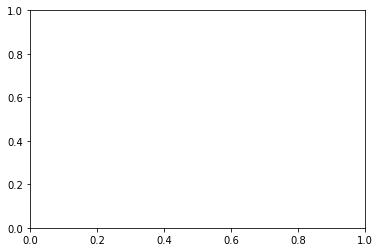

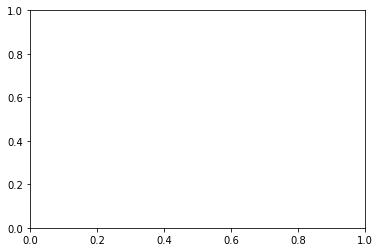

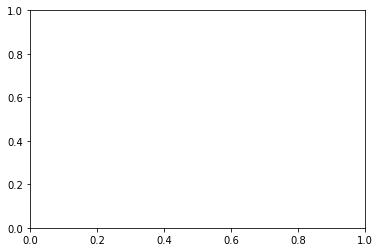

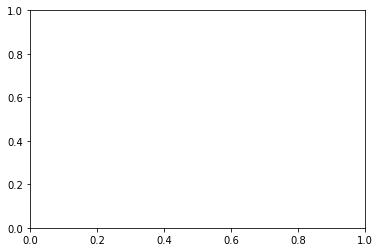

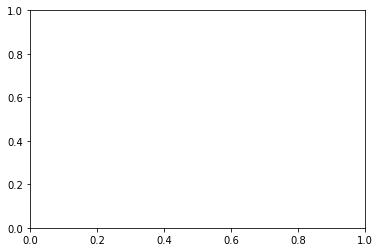

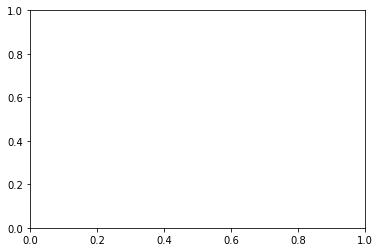

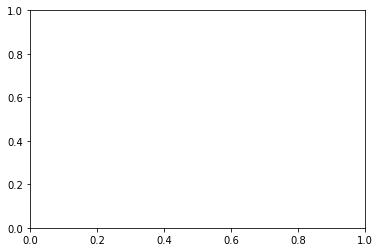

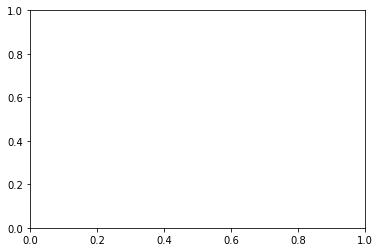

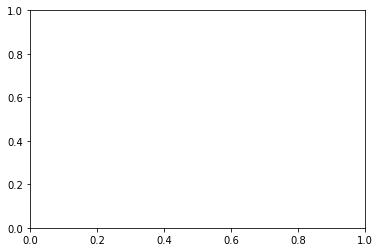

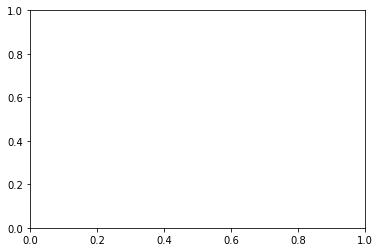

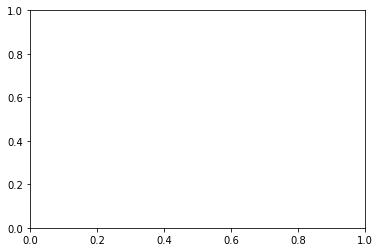

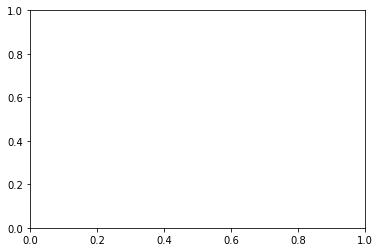

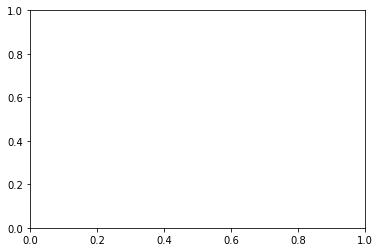

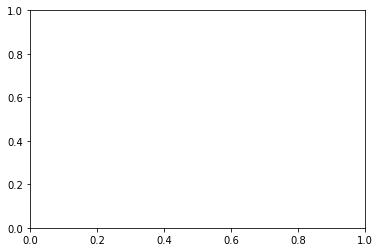

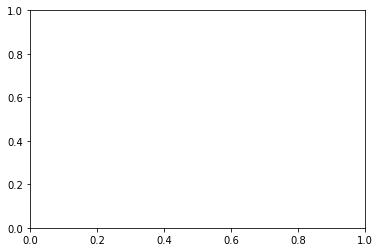

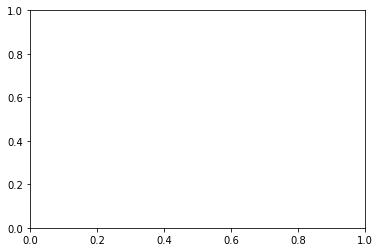

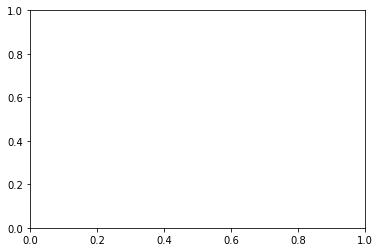

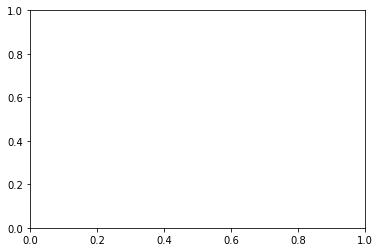

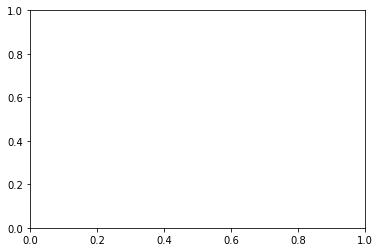

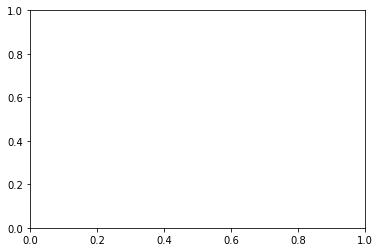

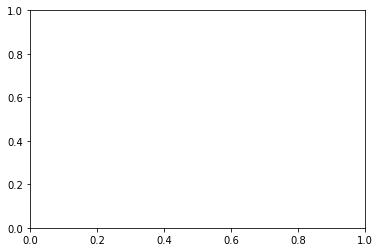

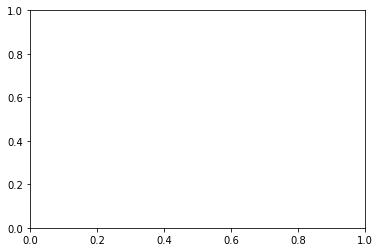

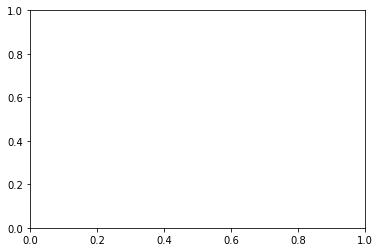

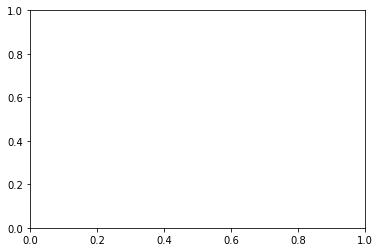

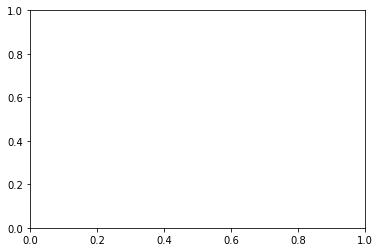

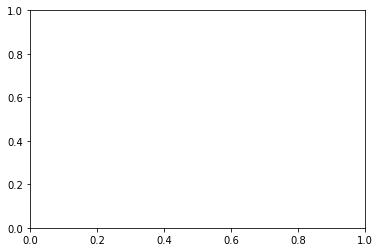

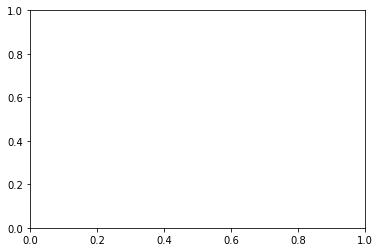

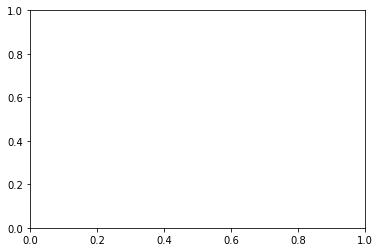

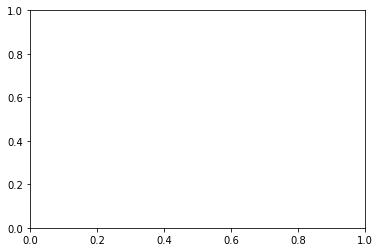

In [11]:
for datadir in datadirs:
    imagedir = 'images_' + datadir
    if not os.path.exists(imagedir):
        os.mkdir(imagedir)
    jsonfiles = glob(os.path.join(datadir, "*.json"))
    for jsonfile in jsonfiles:
        basename = os.path.basename(jsonfile)
        noextension = os.path.splitext(basename)[0]
        imagename = noextension + '.png'
        imagefile = os.path.join(imagedir, imagename)
        parsejsonmatch(jsonfile, imagefile)